<a href="https://colab.research.google.com/github/javierortuno1/pytorch-step-by-step/blob/main/chapter01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

# Chapter 1

In [2]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)
except ModuleNotFoundError:
    pass

from config import *
config_chapter1()
# This is needed to render the plots in this chapter
from plots.chapter1 import *

Installing torchviz...
Creating folders...
Finished!


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

# A Simple Regression Problem

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

In [17]:
true_b = 1
true_w = 2
N = 100      # Total number of points to be made of x and y pairs

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)                  # Creates 100 random x values
epsilon = (.1 * np.random.randn(N, 1))    # Creates 100 noise values
y = true_b + true_w * x + epsilon         # Creates 100 y values

print(x.shape, y.shape)

(100, 1) (100, 1)


### Cell 1.1

In [18]:
# THEN: Create indices to split data based on the generated data
idx = np.arange(N)                  # Creates indices [0,1,2,...,99]
np.random.shuffle(idx)              # Shuffles to like [45,21,8,...,67]

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]         # Takes first 80 indices
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]     # Takes the x values at those 80 indices
x_val, y_val = x[val_idx], y[val_idx]

In [19]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(80, 1) (80, 1)
(20, 1) (20, 1)


(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

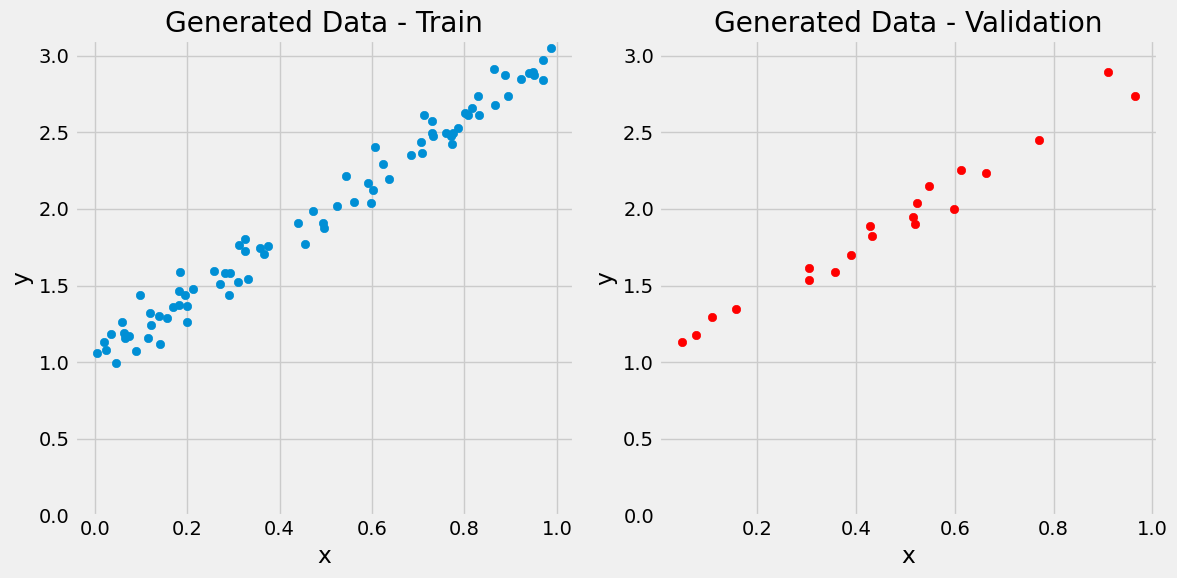

In [20]:
figure1(x_train, y_train, x_val, y_val)

# Gradient Descent

## Step 0: Random Initialization

In [20]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions (FORWARD PASS)

It simply compute the model's predictions (yhat) using the current values of parameters / weights

In [21]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

print(yhat.shape)

(80, 1)


## Step 2: Compute the Loss

In [22]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)            # Difference per point
print(error.shape)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()          # summary statistic, that tells us on average how far off our predictions are from the true values.
print(loss)

(80, 1)
2.7421577700550976


## Step 3: Compute the Gradients (How much our loss changes when we vary each of our two parameters separately?)


Gradient = How much the loss changes if one parameter changes a little bit

In [23]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


## Step 4: Update the Parameters

In [24]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and
# the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


## Step 5: Rinse and Repeat!

In [25]:
# Go back to Step 1 and run observe how your parameters b and w change

# Linear Regression in Numpy

### Cell 1.2

In [26]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):             # Meaning that going once through all of the steps is already one epoch
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train

    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error!
    error = (yhat - y_train)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()

    # Step 4 - Updates parameters using gradients and
    # the learning rate
    b = b - lr * b_grad
    w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]


In [27]:
# Sanity Check: do we get the same results as our
# gradient descent?
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


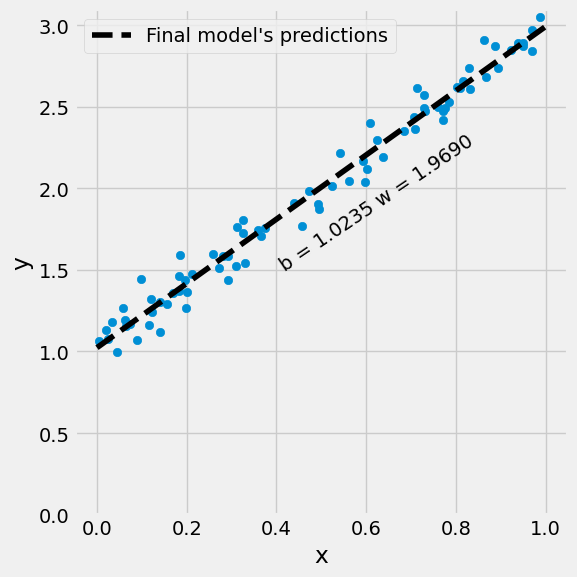

In [28]:
fig = figure3(x_train, y_train)

# PyTorch

## Tensor

In [29]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[ 1.0597, -0.0416,  0.8763,  0.7957],
         [ 0.7865, -0.7329,  1.0715,  0.2057],
         [-0.2233, -1.9006,  0.2356, -0.7141]],

        [[-0.2602,  0.1366, -1.1430, -0.7096],
         [ 0.6857,  0.5971,  0.2479, -1.1979],
         [-0.9257,  0.2143, -0.0945,  0.3145]]])


In [30]:
print(tensor.size(), tensor.shape)

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])


In [31]:
print(scalar.size(), scalar.shape)

torch.Size([]) torch.Size([])


in real applications, reshaping is often necessary to make data compatible with model architectures or mathematical operations.


Key points:

Total number of elements stays the same (2×3 = 1×6 = 6 elements)
It's like reshaping/reorganizing elements:


They share the same memory location - they're looking at the same data just arranged differently
That's why changing one changes both - they're the same data, just viewed differently



In [32]:
# We get a tensor with a different shape but it still is
# the SAME tensor
same_matrix = matrix.view(1, 6)
# If we change one of its elements...
same_matrix[0, 1] = 2.
# It changes both variables: matrix and same_matrix
print(matrix)
print(same_matrix)

# [[1, 1, 1],      [[1, 1, 1, 1, 1, 1]]
#  [1, 1, 1]]  →

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 2., 1., 1., 1., 1.]])


In [33]:
# We can use "new_tensor" method to REALLY copy it into a new one
different_matrix = matrix.new_tensor(matrix.view(1, 6))
# Now, if we change one of its elements...
different_matrix[0, 1] = 3.
# The original tensor (matrix) is left untouched!
# But we get a "warning" from PyTorch telling us
# to use "clone()" instead!
print(matrix)
print(different_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 3., 1., 1., 1., 1.]])


<ipython-input-33-bac3a3914f46>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  different_matrix = matrix.new_tensor(matrix.view(1, 6))


In [34]:
# Lets follow PyTorch's suggestion and use "clone" method
another_matrix = matrix.view(1, 6).clone().detach()
# Again, if we change one of its elements...
another_matrix[0, 1] = 4.
# The original tensor (matrix) is left untouched!
print(matrix)
print(another_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 4., 1., 1., 1., 1.]])


## Loading Data, Devices and CUDA

In [21]:
x_train_tensor = torch.as_tensor(x_train)   # FROM Numpy's arrays to PyTorch's tensors, retruning a Tensor that shares the same underlying data
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

In [22]:
float_tensor = x_train_tensor.float()     # Less space in memory => Less precision
float_tensor.dtype

torch.float32

In [23]:
dummy_array = np.array([1, 2, 3])
dummy_tensor = torch.as_tensor(dummy_array)
# Modifies the numpy array
dummy_array[1] = 1
# Tensor gets modified too...
dummy_tensor

tensor([1, 1, 3])

In [24]:
dummy_tensor.numpy()

# The key is that tensors and numpy arrays serve different purposes,
# and you often need to switch between them depending on what you're trying to do at each step of your ML pipeline.

array([1, 1, 3])

### Defining your device

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [26]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))

In [27]:
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[0]

tensor([0.7713], dtype=torch.float64)

### Cell 1.3

In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [29]:
# Here we can see the difference - notice that .type() is more
# useful since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


Unfortunately, Numpy cannot handle GPU tensors! You need to make them CPU tensors first

In [30]:
back_to_numpy = x_train_tensor.numpy()

In [31]:
# So. to avoid this error, use first cpu() and then numpy()
back_to_numpy = x_train_tensor.cpu().numpy()

## Creating Parameters

In [46]:
# FIRST
# Initializes parameters "b" and "w" randomly, ALMOST as we
# did in Numpy since we want to apply gradient descent on
# these parameters we need to set REQUIRES_GRAD = TRUE. This Flag can be interpreted as an identifier that those parameters are trainables,
# since the requires_grad will computate the gradients of those tensors
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [47]:
# SECOND
# But what if we want to run it on a GPU? We could just
# send them to device, right?
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(b, w)
# Sorry, but NO! The to(device) "shadows" the gradient...

# This new tensor loses the gradient tracking information
# The gradient information gets "shadowed" (lost) in the transfer

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [48]:
# THIRD
# We can either create regular tensors and send them to
# the device (as we did with our data)
torch.manual_seed(42)
b = torch.randn(1, dtype=torch.float).to(device)
w = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
b.requires_grad_()              # In PyTorch, every method that ends with an underscore (_), like the requires_grad_(), make changes in-lace, meaning, they will modify the underlying variable
w.requires_grad_()
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


### Cell 1.4

In [49]:
# FINAL
# We can specify the device at the moment of creation
# RECOMMENDED!

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


# Autograd

## backward

### Cell 1.5

In [50]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
# We are using ALL data points, so this is BATCH gradient descent
# How wrong is our model? That's the error!
error = (yhat - y_train_tensor)
# It is a regression, so it computes mean squared error (MSE) -> Statistic summary of the error
loss = (error ** 2).mean()

# Step 3 - Computes gradients for both "b" and "w" parameters
# No more manual computation of gradients!
# b_grad = 2 * error.mean()
# w_grad = 2 * (x_tensor * error).mean()
loss.backward() # Computing the gradients based on the loss and triggering the chain rule

Since b and w have been set requires_grad=True to both b and w, so they are obviously included in the list. we use them both to compute yhat, so it will also make it to the list. Then we use yhat to compute the error, which is also added to the list.

Then if a tensor in the list is used to compute another tensor, the later will also be included in the list. Tracking these dependencies is exactly what the dynamic computation graph is doing.

In [51]:
print(error.requires_grad, yhat.requires_grad, \
      b.requires_grad, w.requires_grad)
print(y_train_tensor.requires_grad, x_train_tensor.requires_grad)

True True True True
False False


## grad

With the grad attribute we can inspect the actual values of the gradients.

If we compute the Forward pass and with the grad attribute we can see that the gradients are accumulative and that is not what we want. The idea is to calculate the gradients of the current loss, not to accumulate them


Accumulation can be useful in some cases (like when you want to process multiple batches before updating), but usually you want to clear gradients before each backward pass to ensure proper parameter updates.

The key is that without clearing gradients, you're using incorrect gradient values for your parameter updates, which can prevent proper model training.

```
# First backward pass
loss.backward()  # grad = 0.5

# Second backward pass without clearing
loss.backward()  # grad = 0.5 + 0.5 = 1.0

# Third backward pass without clearing  
loss.backward()  # grad = 1.0 + 0.5 = 1.5
```

It turns out this behavior of accumulating the gradients can be useful to circumvent hardware limitations. During the training of large models, the necessary number of data points in a mini-batch my be too large to fit in memory (of the graphics card). How can one solve this, other than buying more-expensive hardware?

One can split a mini-batch into "sub-mini-batches", comput the gradients for those "subs" and accumulate them to achieve the same result as computing the gradients on the full mini-batch


In [52]:
print(b.grad, w.grad)

tensor([-3.1125]) tensor([-1.8156])


In [53]:
# Just run the two cells above one more time

## zero_

Every time we use the gradients to update the parameters, we need to zero the gradients afterwards. Therefore we can use this function. And we do it in-place to affect the underlying data

In [54]:
# This code will be placed *after* Step 4
# (updating the parameters)
b.grad.zero_(), w.grad.zero_()

(tensor([0.]), tensor([0.]))

## Updating Parameters

### Cell 1.6

In [55]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor

    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error!
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    # No more manual computation of gradients!
    # b_grad = 2 * error.mean()
    # w_grad = 2 * (x_tensor * error).mean()
    # We just tell PyTorch to work its way BACKWARDS
    # from the specified loss!
    loss.backward()

    # Step 4 - Updates parameters using gradients and
    # the learning rate. But not so fast...
    # FIRST ATTEMPT - just using the same code as before
    # AttributeError: 'NoneType' object has no attribute 'zero_'
    # b = b - lr * b.grad
    # w = w - lr * w.grad
    # print(b)

    # SECOND ATTEMPT - using in-place Python assigment
    # RuntimeError: a leaf Variable that requires grad
    # has been used in an in-place operation.
    # b -= lr * b.grad
    # w -= lr * w.grad

    # THIRD ATTEMPT - NO_GRAD for the win!
    # We need to use NO_GRAD to keep the update out of
    # the gradient computation. Why is that? It boils
    # down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad

    # PyTorch is "clingy" to its computed gradients, we
    # need to tell it to let it go...
    b.grad.zero_()
    w.grad.zero_()

print(b, w)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


## no_grad

It allows us to perform regular python operations on tensors without affecting PyTorch's computation graph

In a nutshell, it allows us to update the params

In [56]:
# This is what we used in the THIRD ATTEMPT...

# Dynamic Computation Graph

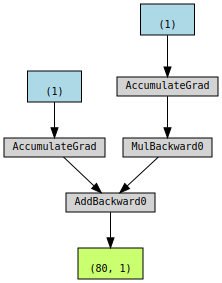

In [96]:
# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train_tensor)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

# We can try plotting the graph for any python variable:
# yhat, error, loss...
make_dot(yhat)

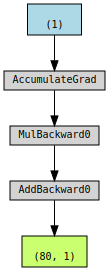

In [97]:
b_nograd = torch.randn(1, requires_grad=False, \
                       dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

yhat = b_nograd + w * x_train_tensor

make_dot(yhat)

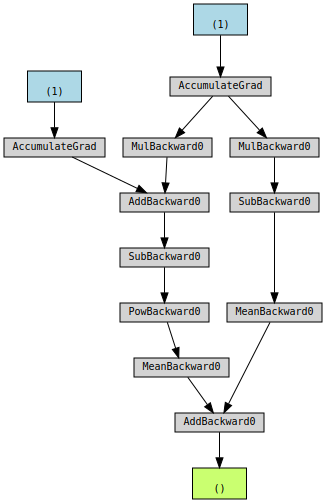

In [98]:
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

yhat = b + w * x_train_tensor
error = yhat - y_train_tensor
loss = (error ** 2).mean()

# this makes no sense!!
if loss > 0:
    yhat2 = w * x_train_tensor
    error2 = yhat2 - y_train_tensor

# neither does this :-)
loss += error2.mean()

make_dot(loss)

# Optimizer

They are the responsible of updating the params through its step() method

## step / zero_grad

In [57]:
# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

### Cell 1.7

In [58]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor

    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error!
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and
    # the learning rate. No more manual update!
    # with torch.no_grad():
    #     b -= lr * b.grad
    #     w -= lr * w.grad
    optimizer.step()

    # No more telling Pytorch to let gradients go!
    # b.grad.zero_()
    # w.grad.zero_()
    optimizer.zero_grad() # it ensures each iteration starts with a clean slate for gradient computation.

print(b, w)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


# Loss

In [59]:
# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')
loss_fn

MSELoss()

In [62]:
# This is a random example to illustrate the loss function
predictions = torch.tensor([0.5, 1.0])
labels = torch.tensor([2.0, 1.3])
loss_fn(predictions, labels)

print(predictions.size())
print(loss_fn(predictions, labels).size())

torch.Size([2])
torch.Size([])


### Cell 1.8

In [63]:
# Sets learning rate - this is "eta" ~ the "n"-like
# Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor             # prediction and therefore forward pass

    # Step 2 - Computes the loss
    # No more manual loss!
    # error = (yhat - y_train_tensor)
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train_tensor)    # loss calculation

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()              # gradients and chain rule

    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()            # updating params
    optimizer.zero_grad()       # cleaning

print(b, w)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [70]:
loss
print(loss)
print(loss.item())

tensor(0.0080, grad_fn=<MseLossBackward0>)
0.008044655434787273


In [65]:
loss.cpu().numpy()     # the los tensor is actually computing gradientes; to use numpy, we need to detach() the tensor from the computation graph

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [66]:
loss.detach().cpu().numpy()

array(0.00804466, dtype=float32)

In [71]:
print(loss.item(), loss.tolist())   # Or we can use directly the fuctions "item" or "tolist" for extracting the value out of the tensor

0.008044655434787273 0.008044655434787273


# Model

### Cell 1.9

In [12]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "b" and "w" real parameters of the model,
        # we need to wrap them with nn.Parameter
        self.b = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

    def forward(self, x):
        # Computes the outputs / predictions
        return self.b + self.w * x

## Parameters

In [11]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
dummy = ManualLinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

## state_dict

It's a method for getting the current values of all the model's params. It is a python dictionary that maps each attribute / parameter to its corresponding tensor

Its purpose is to keep track of parameters that are going to be updated by the optimizer

state_dict() is crucial for:

* Inspecting model parameters
* Saving/loading models
* Tracking parameter changes during training

In [33]:
dummy.state_dict()

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

In [32]:
optimizer.state_dict()

NameError: name 'optimizer' is not defined

## device

In [34]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
# and sends it to the device
dummy = ManualLinearRegression().to(device)

## Forward Pass

### Cell 1.10

In [78]:
# Sets learning rate - this is "eta" ~ the "n"-like
# Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)               # init the model with the parms

# Defines a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    model.train() # What is this?!?    --> this is a good practice for setting the model to a train flag

    # Step 1 - Computes model's predicted output - forward pass
    # No more manual prediction!
    yhat = model(x_train_tensor) # It will call or send the data through the forward pass ()prediction

    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()

# We can also inspect its parameters using its state_dict
print(model.state_dict())

OrderedDict([('b', tensor([1.0235])), ('w', tensor([1.9690]))])


## train

In [79]:
## Never forget to include model.train() in your training loop!

## Nested Models

Key points:

* in_features: Number of elements in your input vector
* out_features: Number of elements you want in your output vector
* Each output unit will be connected to ALL input elements

For a layer with in_features=n and out_features=m:

* Input must be a vector of size n
* Output will be a vector of size m
* Layer will have (n × m) weights + m biases

In [9]:
linear = nn.Linear(1, 1) # We are implementing a single-feature linear regression
linear

Linear(in_features=1, out_features=1, bias=True)

state_dict() is crucial for:

* Inspecting model parameters
* Saving/loading models
* Tracking parameter changes during training

In [10]:
linear.state_dict()   # Here we get all the params of the model

OrderedDict([('weight', tensor([[0.3079]])), ('bias', tensor([0.5311]))])

### Cell 1.11

In [12]:
# Each instance of MyLinearRegression will have its own linear layer
class MyLinearRegression(nn.Module):
    # Constructor: we're installing components (the linear layer)
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a Linear model
        # with single input and single output
        # Create a Linear layer as an attribute of this class
        self.linear = nn.Linear(1, 1) # This becomes a property of the class

    # we're using those components to process inputs
    # PyTorch will automatically call forward when you do model(x)
    def forward(self, x):
        # Now it only takes a call
        # Use the linear layer attribute to process input x
         # PyTorch will automatically call the nested forward of nn.Linear
        self.linear(x)

In [28]:
torch.manual_seed(42)
dummy = MyLinearRegression().to(device)
print(list(dummy.parameters()))
print(dummy.state_dict())

[Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]
OrderedDict([('linear.weight', tensor([[0.7645]])), ('linear.bias', tensor([0.8300]))])


In [29]:
dummy.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

## Sequential Models

Straightforward models that use a series of built-in Pytorch models (like Linear), where the output of one is sequentially fed as an input to the next



### Cell 1.12

In [36]:
torch.manual_seed(42)
# Alternatively, you can use a Sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device)

model.state_dict()

OrderedDict([('0.weight', tensor([[0.7645]])), ('0.bias', tensor([0.8300]))])

## Layers

Models inside other models can be called a layer for any internal model

Therefore a Linear model can be seen as a layer in a neural Network

In [35]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)

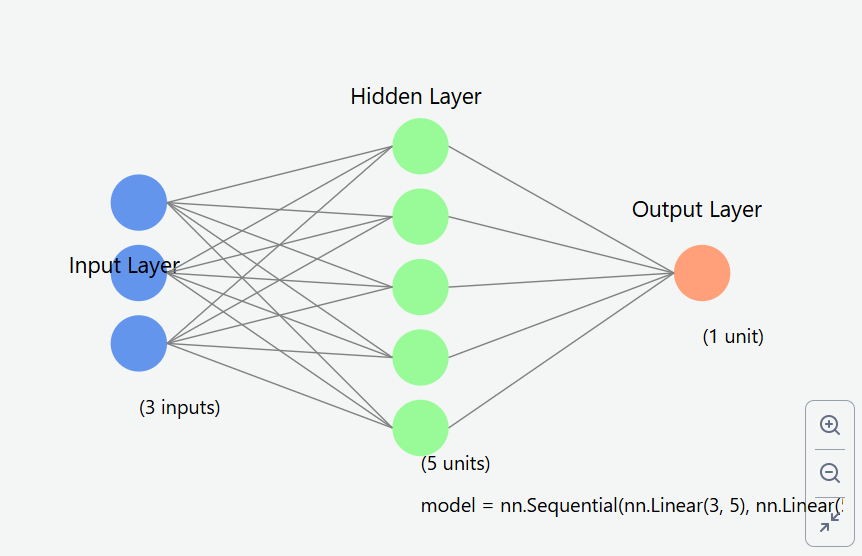

In [36]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential()
# built-in method of the Sequential libray for adding a name to a layer
model.add_module('layer1', nn.Linear(3, 5))
model.add_module('layer2', nn.Linear(5, 1))
model.to(device)

print(model)
print(model.state_dict())

Sequential(
  (layer1): Linear(in_features=3, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)
OrderedDict([('layer1.weight', tensor([[ 0.4414,  0.4792, -0.1353],
        [ 0.5304, -0.1265,  0.1165],
        [-0.2811,  0.3391,  0.5090],
        [-0.4236,  0.5018,  0.1081],
        [ 0.4266,  0.0782,  0.2784]])), ('layer1.bias', tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472])), ('layer2.weight', tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]])), ('layer2.bias', tensor([-0.2062]))])


There are many different layers that can be used in Pytorch

# Putting It All Together

The code is organized into three fundamentals pilars or in the pipeline after the data generation

* Data Preparation
* Model Configuration
* Model Training

## Data Preparation

### Data Preparation V0

In [37]:
%%writefile data_preparation/v0.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

Writing data_preparation/v0.py


In [38]:
%run -i data_preparation/v0.py

<Figure size 640x480 with 0 Axes>

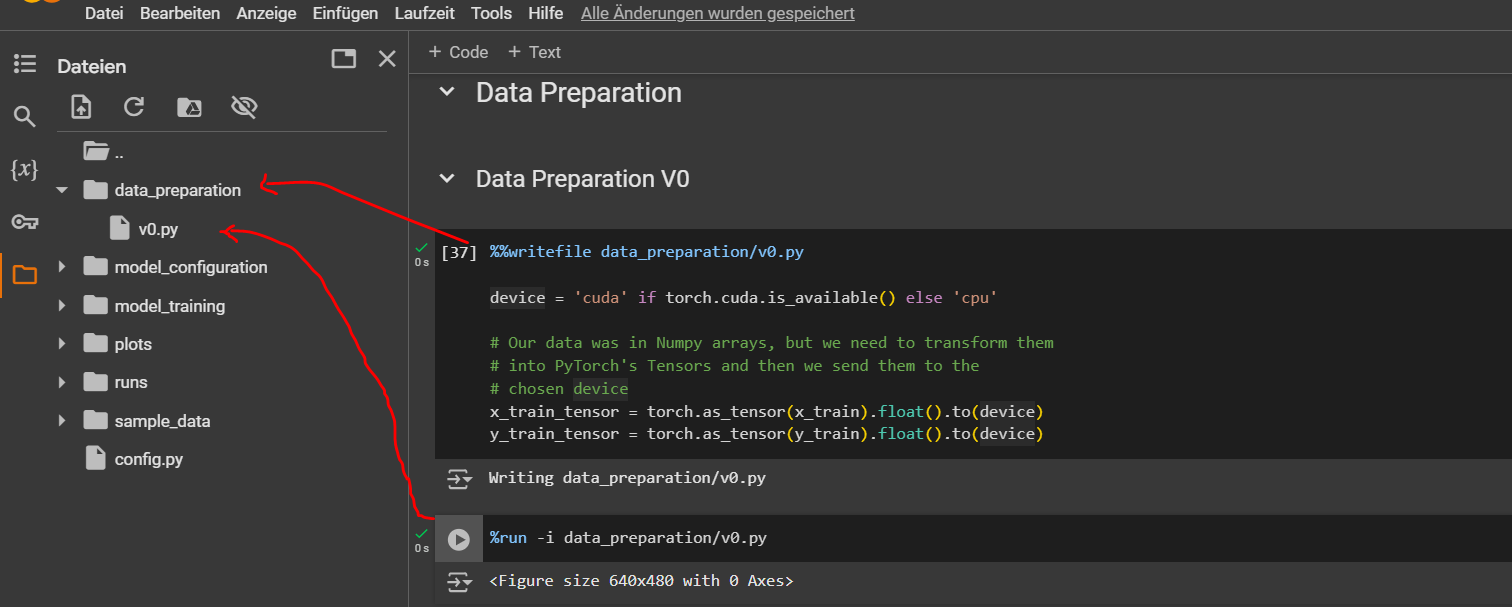


The idea is to have versioning of the different stages of the pipeline. In this way, we can re-start a process startgin from one specif pipeline's stage



## Model Configurtion

### Model Configuration V0

In [42]:
%%writefile model_configuration/v0.py

# This is redundant now, but it won't be when we introduce
# Datasets...
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = nn.Sequential(nn.Linear(1, 1)).to(device)

# Defines a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

Overwriting model_configuration/v0.py


In [43]:
%run -i model_configuration/v00.py

## Model Training

### Model Training V0

In [44]:
%%writefile model_training/v0.py

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Sets model to TRAIN mode
    model.train()

    # Step 1 - Computes model's predicted output - forward pass
    yhat = model(x_train_tensor)

    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()

Writing model_training/v0.py


In [45]:
%run -i model_training/v0.py

In [46]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9690]])), ('0.bias', tensor([1.0235]))])
